In [43]:
import panel as pn
import os
import hvplot.pandas
import pandas as pd
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

%matplotlib inline

In [44]:
# Upload data into DFs
allstar_df = pd.read_csv('2021allstar.csv',infer_datetime_format=True,parse_dates=True, index_col='Transaction Date')
allstartotal_df = pd.read_csv('2021allstartotalvalue.csv',infer_datetime_format=True,parse_dates=True, index_col='DateTime')
allstar_summary = pd.read_csv('2021allstarplayersummary.csv',index_col='Player Name')

In [45]:
# Remove Time from DateTime Format
allstar_df.index = allstar_df.index.date
allstartotal_df.index = allstartotal_df.index.date

In [95]:
# Sort Data by index
allstar_df.sort_index(inplace=True)
allstar_summary.sort_values('Low Ask',ascending=False,inplace=True)

In [133]:
# Remove 2 "Rare" moments that skew data. The remainder of player moments all have 2021 moments
allstar_df = allstar_df[(allstar_df['Player Name'] != 'Giannis Antetokounmpo') & (allstar_df['Player Name'] != 'Damian Lillard')]
allstar_summary = allstar_summary[(allstar_summary.index != 'Giannis Antetokounmpo') & (allstar_summary.index != 'Damian Lillard')]

In [ ]:
#Create DF for number of transactions
number_of_transactions_df = allstar_df.groupby('Player Name').count().filter(['Player Name','Set'])
number_of_transactions_df.columns = ['Transaction Count']
number_of_transactions_df.sort_values('Transaction Count',inplace=True,ascending=False)
number_of_transactions_df

In [146]:
# Create graph with number of transactions
transaction_count_plot = number_of_transactions_df.hvplot.bar(rot=90,color='green')
transaction_count_plot

:Bars   [Player Name]   (Transaction Count)

In [136]:
# Create DF for negative correlation check between serial number and purchase price
correlation_df = allstar_df.filter(['Player Name','Serial','Purchase Price'],axis=1)
correlation_df.sort_index(inplace=True)

In [151]:
# Graph Correlation between Serial number and Price
price_serial_corr = correlation_df.corr()
price_serial_corr_plot = price_serial_corr.hvplot.heatmap()
price_serial_corr_plot

:HeatMap   [columns,index]   (value)

In [156]:
# Create chart with dropdown by Player Name
hist_player_prices = allstar_df.hvplot.line(y='Purchase Price',groupby='Player Name')
hist_player_prices

:DynamicMap   [Player Name]
   :Curve   [index]   (Purchase Price)

In [161]:
# Graph Value of 2021 All Star set
allstar_set_plot = allstartotal_df.hvplot.line(ylim=(0,18000))
allstar_set_plot

:Curve   [index]   (2021 All-Star Game)

In [167]:
# Create graph with lowest ask by player
allstar_low_ask_plot = allstar_summary.hvplot.bar(y='Low Ask',rot=90)
allstar_low_ask_plot


:Bars   [Player Name]   (Low Ask)

In [141]:
# Create scatter plot showing correlation between low serial number and high purchase price
serial_price_corrallstar_df.hvplot.scatter(x='Serial', y='Purchase Price', groupby = 'Player Name',width = 1200, height =500,xticks = 25)

:DynamicMap   [Player Name]
   :Scatter   [Serial]   (Purchase Price)

In [168]:
# Create functions for dashboarding

def set_value():
    return allstar_set_plot

def player_floor():
    return allstar_low_ask_plot

def player_pricing():
    return hist_player_prices

def serial_price():
    return allstar_df.hvplot.scatter(x='Serial', y='Purchase Price', groupby = 'Player Name',width = 1200, height =500,xticks = 25)

def serial_price_heatmap():
    return price_serial_corr_plot

def number_of_transactions():
    return transaction_count_plot

In [169]:
# Create columns for dashboard
dashboard_title = "NBA TopShot Evaluator"
welcome_message = "This is our NBA TopShot Evaluator.  Our mission is to help collectors accurately value their NFT portfolios and identify opportunities."
pricing_vs_transcount_findings = "Observations: We found that, generally speaking, the number of transactions did not seem to be affected by floor price.  This shows that demand for individual moments was not detered by cost of moments."
serial_findings = "Observations: We observe a slightly negative correlation between serial numbers and prices. However, this relationship is heavily weighted in the top 100 serial numbers as shown in the scatter and heatmap plots. With the current portfolio eval tools, an investors portfolio will not be accurately represented if they own low serials. Evaluation tools simply take the floor price of moments, and use that to determine portfolio value, leading to deflated portfolio valuation."
all_star_icon = pn.pane.PNG('2021allstar.png', height=150, width=150)


welcome_column = pn.Column(
        dashboard_title,
        all_star_icon,
        welcome_message,
        '2021 All Star Set Value',set_value()            
)

floor_column = pn.Column(
            all_star_icon,
            pricing_vs_transcount_findings,
            'Historal Prices by Player', player_pricing(),
            'Player Floor Price',player_floor(),
            'Number of Transactions by Player', number_of_transactions()
)

serial_column = pn.Column(
            all_star_icon,
            serial_findings,
            serial_price,
            serial_price_heatmap
)
        

In [170]:
# Create Tabs for dashboard
tabs = pn.Tabs(
        ("Welcome",welcome_column),
        ("2021 All Star Pricing",floor_column),
        ("Serial Number/Price",serial_column)
        
)

Tabs
    [0] Column
        [0] Markdown(str)
        [1] PNG(str, height=150, sizing_mode='fixed', width=150)
        [2] Markdown(str)
        [3] Markdown(str)
        [4] HoloViews(Curve)
    [1] Column
        [0] PNG(str, height=150, sizing_mode='fixed', width=150)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='Player Name', options=['Mike Conley', ...], value='Mike Conley', width=250)
                [1] VSpacer()
        [4] Markdown(str)
        [5] HoloViews(Bars)
        [6] Markdown(str)
        [7] HoloViews(Bars)
    [2] Column
        [0] PNG(str, height=150, sizing_mode='fixed', width=150)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive44472')
                    [0] HoloViews(DynamicMap, name='interactive44472')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='Player Name', options=['Mike Conley', ...], value='Mike Conley', width=250)
                        [1] VSpacer()
        [3] Column
            [0] Column()
            [1] Row
                [0] HoloViews(HeatMap, name='interactive44523')
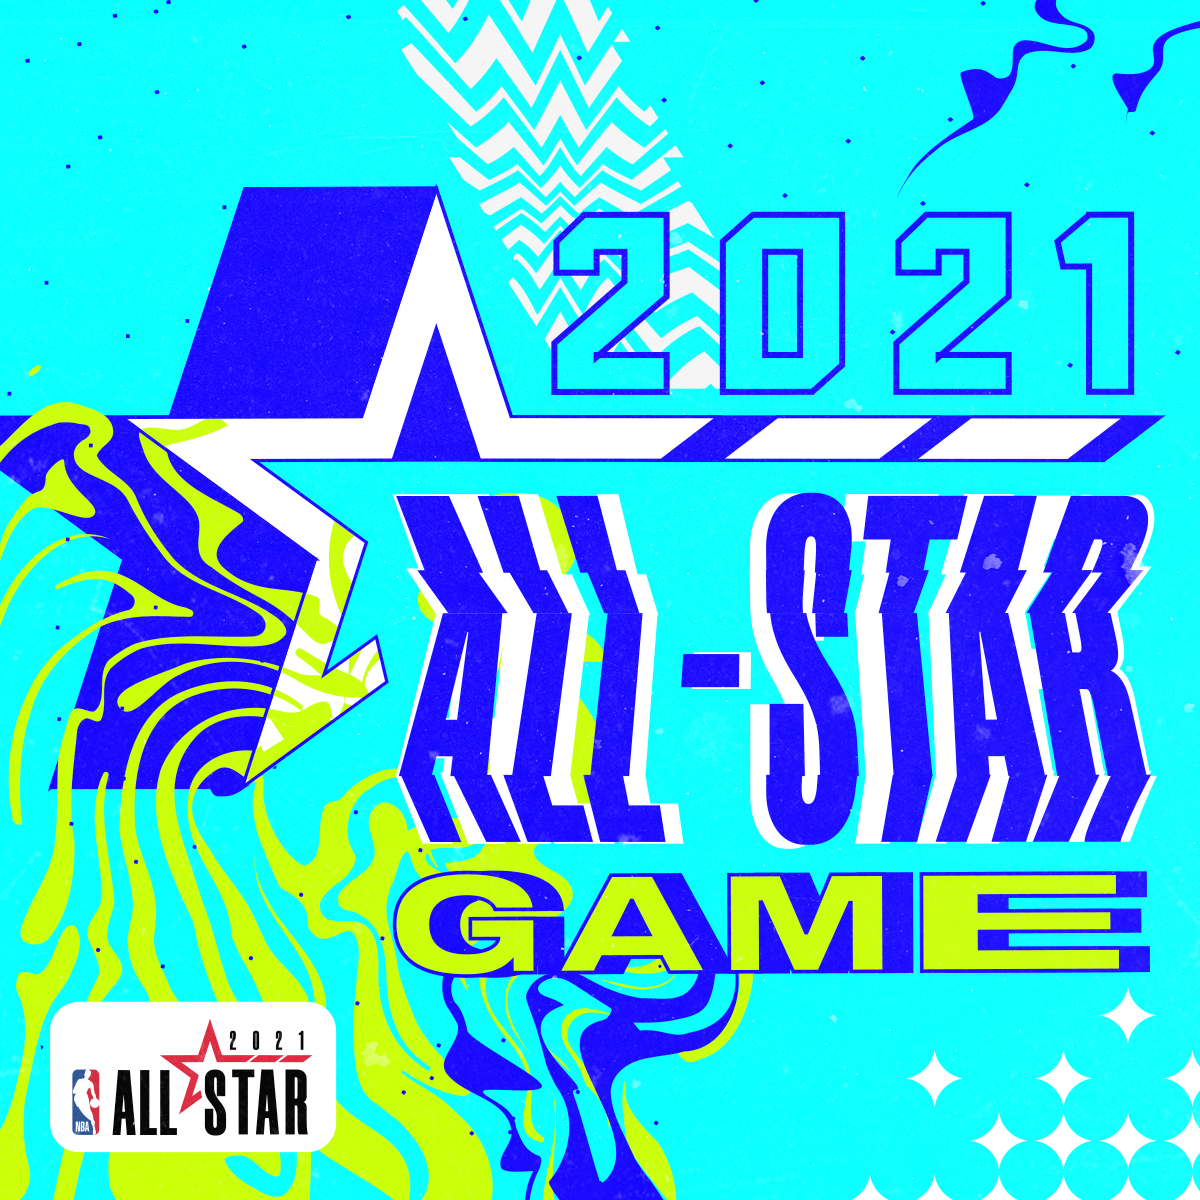
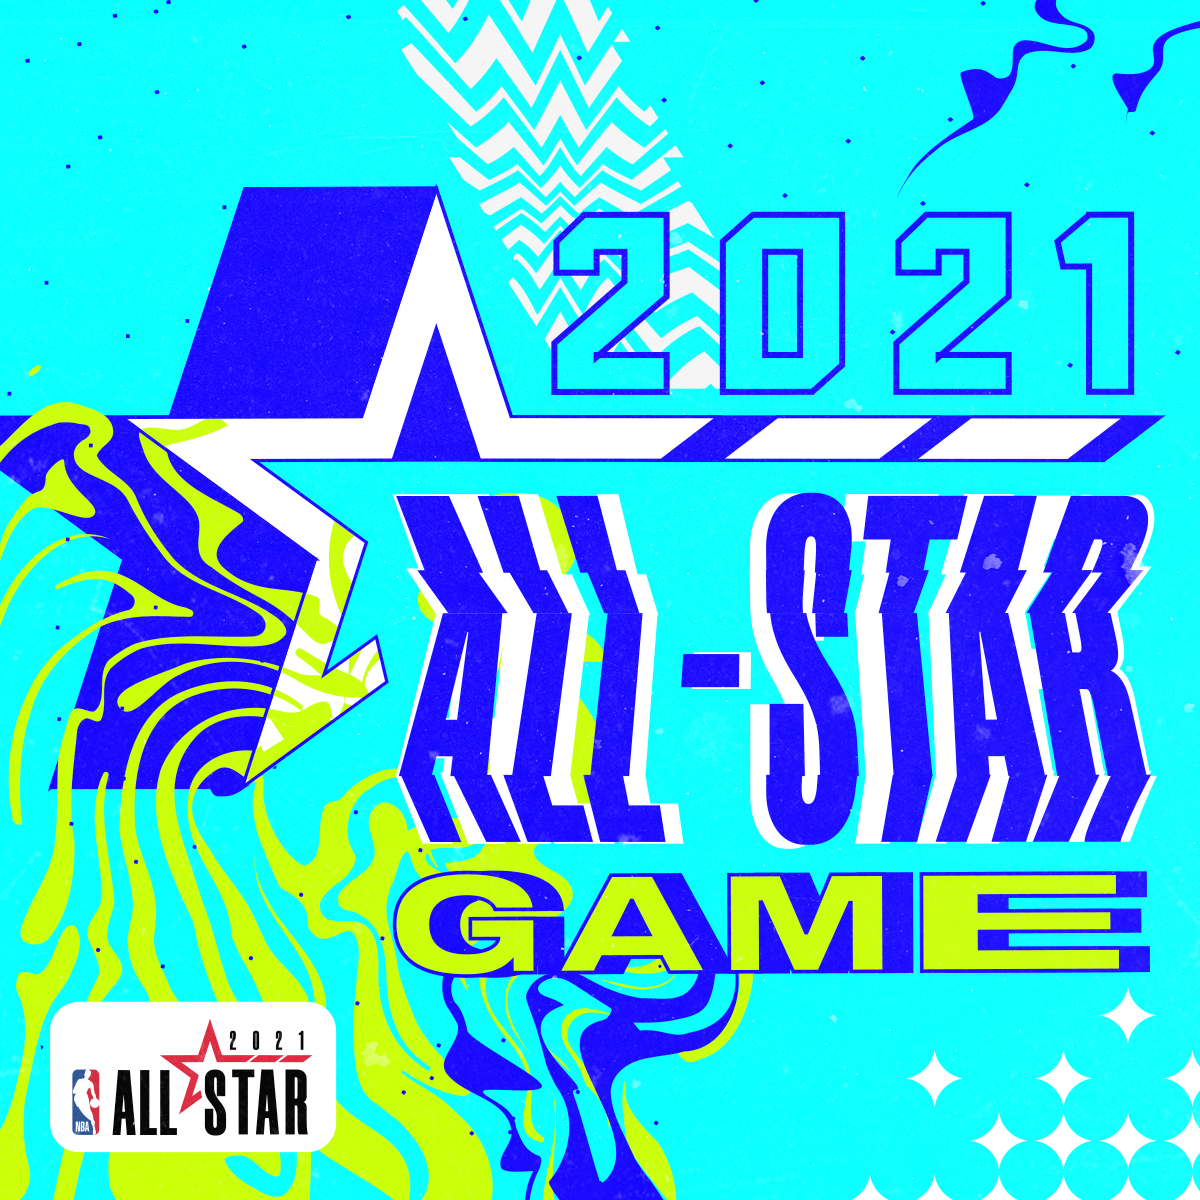
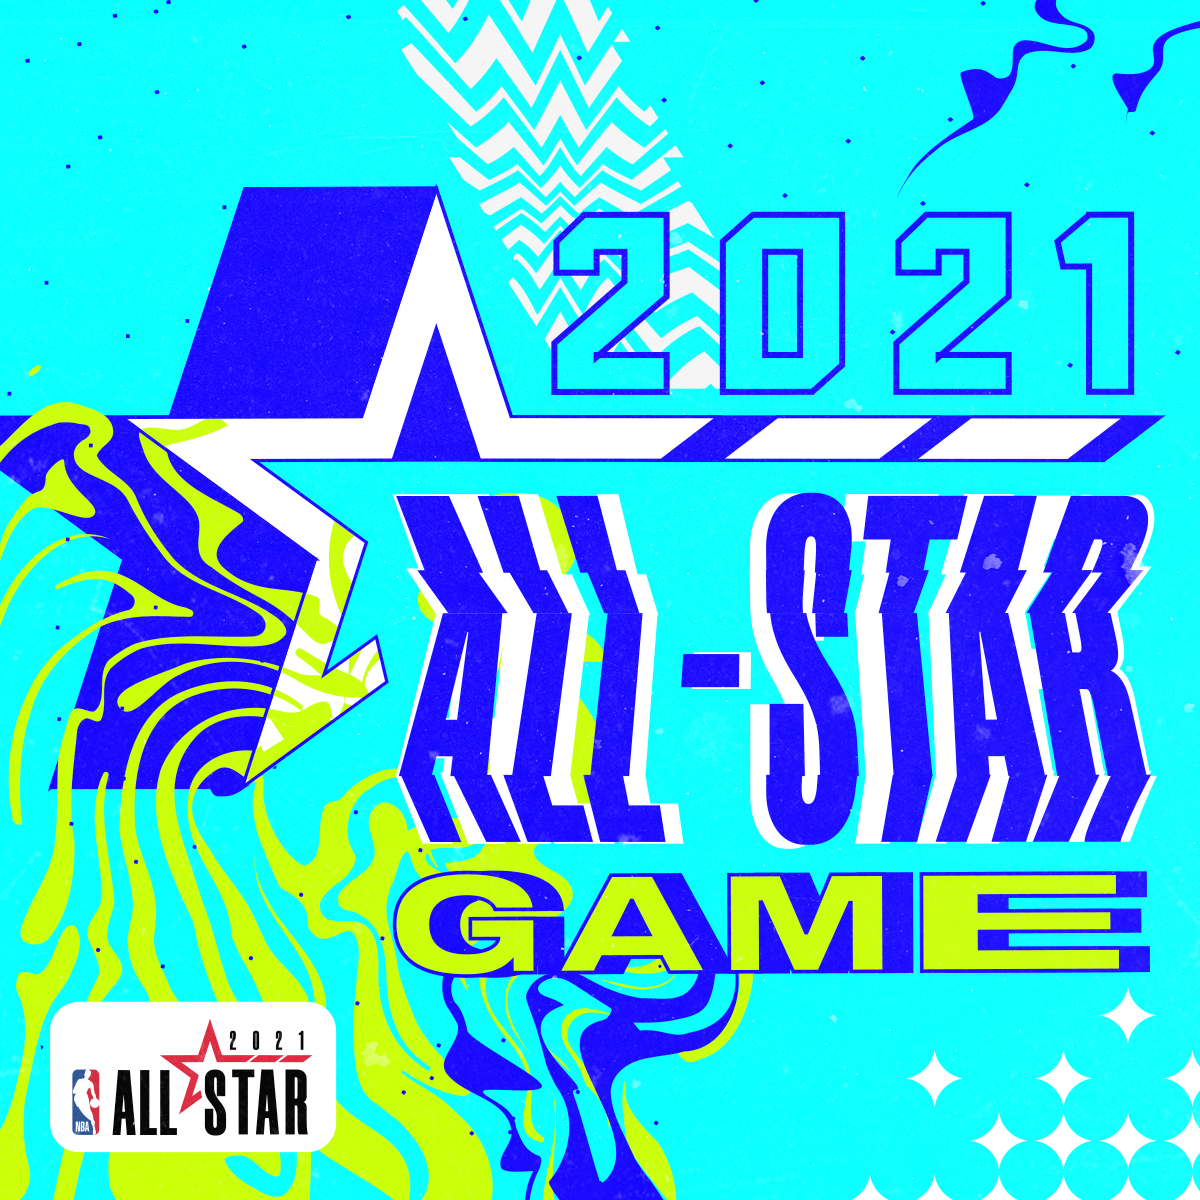

In [171]:
tabs